# Project: Write a Data Science Blog Post



# Business Overview

Analyze the Seattle Airbnb data and come up with 3 to 5 business questions. Use the data to answer the business questions. Write and publish a data science blog post based on your overall findings

# Business Questions / Business Understanding
1. What are the room type preferences in the Seattle Airbnb market?
2. What are the property types hosts have offered for the Seattle Airbnb market?
3. What are the price distributions for the different room types offered for the Seattle Airbnb market?
4. Which neighborhoods in the Seattle area have the most property listed?

# Data Understanding

We have 3 datasets obtained from Kaggle that describe the listing activity of homestays in Seattle. The following Airbnb activity is included in this Seattle dataset:

1. Listings, including full descriptions and average review score. CSV file.
2. Reviews, including a unique ID for each reviewer and detailed comments. CSV file.
3. Calendar, including listing id and the price and availability for that day. CSV file.

# Data Preparation

In [82]:
#Import Necessary Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Import CSV for Calendar Dataset
airbnb_calendar = pd.read_csv('C:/Drive D/Udacity Projects/Data Science Blog Post/calendar.csv')

**Exploring The Calendar Dataset**

In [5]:
# First 5 Rows
airbnb_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [10]:
# Summary Statistics
airbnb_calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [4]:
#Dataframe Summary
airbnb_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [27]:
# Check For Duplicates
airbnb_calendar.duplicated().value_counts()

False    1393570
dtype: int64

In [14]:
# Check For Null Value Percentages Per Column
missing_percentage_calendar = (airbnb_calendar.isnull().sum() / len(airbnb_calendar)) * 100
print(missing_percentage_calendar)

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64


**Data Cleaning For Calendar Dataset**

In [16]:
# To convert price to numeric, remove " $" and "," from each value
airbnb_calendar['price_clean'] = airbnb_calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)
print(airbnb_calendar['price_clean'])


C:\Users\katika\AppData\Local\Temp\ipykernel_10624\2043851178.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_calendar['price_clean'] = airbnb_calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)


0          85.0
1          85.0
2           NaN
3           NaN
4           NaN
           ... 
1393565     NaN
1393566     NaN
1393567     NaN
1393568     NaN
1393569     NaN
Name: price_clean, Length: 1393570, dtype: float64


In [17]:
# Print First 5 Rows
print(airbnb_calendar.head())

   listing_id        date available   price  price_clean
0      241032  2016-01-04         t  $85.00         85.0
1      241032  2016-01-05         t  $85.00         85.0
2      241032  2016-01-06         f     NaN          NaN
3      241032  2016-01-07         f     NaN          NaN
4      241032  2016-01-08         f     NaN          NaN


In [18]:
# Check For Skewness of Data to Inform Imputation Strategy
print("Skewness:", airbnb_calendar['price_clean'].skew())

Skewness: 3.2084077618844886


In [19]:
# Choose imputation method based on the skew output
if airbnb_calendar['price_clean'].skew() > 1 or airbnb_calendar['price_clean'].skew() < -1:
    median_value = airbnb_calendar['price_clean'].median()
    airbnb_calendar['price_clean'].fillna(median_value, inplace=True)
else:
    mean_value = airbnb_calendar['price_clean'].mean()
    airbnb_calendar['price_clean'].fillna(mean_value, inplace=True)

In [20]:
#DataFrame Summary
airbnb_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   listing_id   1393570 non-null  int64  
 1   date         1393570 non-null  object 
 2   available    1393570 non-null  object 
 3   price        934542 non-null   object 
 4   price_clean  1393570 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 53.2+ MB


In [84]:
#Summary statistics for cleaned price column
airbnb_calendar['price_clean'].describe()

count    1.393570e+06
mean     1.284107e+02
std      8.710565e+01
min      1.000000e+01
25%      9.000000e+01
50%      1.090000e+02
75%      1.300000e+02
max      1.650000e+03
Name: price_clean, dtype: float64

In [79]:
#What is the average listing price per night?
avg_price = airbnb_calendar['price_clean'].mean()
print(avg_price)

128.41071205608617


**Exploring the Reviews Dataset**

In [70]:
#Import Reviews Dataset
airbnb_reviews = pd.read_csv('C:/Drive D/Udacity Projects/Data Science Blog Post/reviews.csv')

In [71]:
#Check First Five Rows
airbnb_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [72]:
#Summary Statistics
airbnb_reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [73]:
#Dataframe Summary
airbnb_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [74]:
#Check For Duplicates
airbnb_reviews.duplicated().value_counts()

False    84849
dtype: int64

In [75]:
# Check For Null Value Percentages Per Column
missing_percentage_reviews = (airbnb_reviews.isnull().sum() / len(airbnb_reviews)) * 100
print(missing_percentage_reviews)

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.021214
dtype: float64


**Exploring The Listings Dataset**

In [36]:
#Import Data
airbnb_listings = pd.read_csv('C:/Drive D/Udacity Projects/Data Science Blog Post/listings.csv')

In [7]:
#First 5 Rows
airbnb_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [23]:
#Summary Statistics
airbnb_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [24]:
#Dataframe Summary
airbnb_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [26]:
#Check For Missing Values Per Column
missing_percentage_listings = (airbnb_listings.isnull().sum() / len(airbnb_listings)) * 100
print(missing_percentage_listings.sort_values(ascending=False))

license             100.000000
square_feet          97.459403
monthly_price        60.267156
security_deposit     51.126244
weekly_price         47.380828
                       ...    
room_type             0.000000
accommodates          0.000000
bed_type              0.000000
amenities             0.000000
longitude             0.000000
Length: 92, dtype: float64


In [44]:
# Drop duplicate columns
airbnb_listings = airbnb_listings.T.drop_duplicates().T

In [45]:
# Drop columns that contain only missing values
airbnb_listings.dropna(axis=1, how='all', inplace=True)

In [47]:
# Remove columns that contain only one unique value
airbnb_listings.drop([x for x in airbnb_listings.columns if airbnb_listings[x].nunique()==1], axis=1, inplace=True)

In [50]:
# Drop columns with url data
airbnb_listings.drop(airbnb_listings.columns[airbnb_listings.columns.str.contains("url")], axis=1, inplace=True)

In [53]:
# Convert all prices to numeric
airbnb_listings.price = airbnb_listings.price.str.replace(r"$", "").str.replace(",", "").astype("float32")
airbnb_listings.weekly_price = airbnb_listings.weekly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
airbnb_listings.monthly_price = airbnb_listings.monthly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
airbnb_listings.security_deposit = airbnb_listings.security_deposit.str.replace(r"$", "").str.replace(",", "").astype("float32")
airbnb_listings.cleaning_fee = airbnb_listings.cleaning_fee.str.replace(r"$", "").str.replace(r"$", "").str.replace(",", "").astype("float32")
airbnb_listings.extra_people = airbnb_listings.extra_people.str.replace(r"$","").str.replace(",","").astype("float32")

AttributeError: Can only use .str accessor with string values!

In [55]:
#Check updated dataframe after step above
airbnb_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   object 
 1   name                              3818 non-null   object 
 2   summary                           3641 non-null   object 
 3   space                             3249 non-null   object 
 4   description                       3818 non-null   object 
 5   neighborhood_overview             2786 non-null   object 
 6   notes                             2212 non-null   object 
 7   transit                           2884 non-null   object 
 8   host_id                           3818 non-null   object 
 9   host_name                         3816 non-null   object 
 10  host_since                        3816 non-null   object 
 11  host_location                     3810 non-null   object 
 12  host_a

In [59]:
# Drop columns missing more than 40% of their data
drop_columns = [
    'square_feet', 'summary', 'space', 'neighborhood_overview', 'notes', 'transit',
]

# Extend the initial list of columns to drop by including all host-related columns 
host_info_columns = airbnb_listings.columns[airbnb_listings.columns.str.contains('^host_')]
drop_columns.extend(host_info_columns)

# Dropping the columns
airbnb_listings.drop(columns=drop_columns, inplace=True)

In [60]:
# Segregating numerical and categorical columns in the dataFrame
numerical_columns = airbnb_listings.select_dtypes(exclude=object).columns.tolist()
categorical_columns = airbnb_listings.select_dtypes(include=object).columns.tolist()

In [61]:
# Handling Missing Values
from sklearn.impute import SimpleImputer
# Numeric columns: Median Imputation
numeric_imputer = SimpleImputer(strategy='median')
airbnb_listings[numerical_columns] = numeric_imputer.fit_transform(airbnb_listings[numerical_columns])

# Categorical columns: Mode Imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
airbnb_listings[categorical_columns] = categorical_imputer.fit_transform(airbnb_listings[categorical_columns])


# Modelling

In [80]:
# What are the room types/configurations in raw counts?
room_counts = airbnb_listings['room_type'].value_counts()
print(room_counts)

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64


In [86]:
#Average daily price from listings dataset
listing_avg_price = airbnb_listings['price'].mean()
print(listing_avg_price)

127.97616553169199


In [87]:
#Summary statistics for price in listings dataset
airbnb_listings['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [81]:
# What are the room types/configurations in percentages?
room_percentages = airbnb_listings['room_type'].value_counts(normalize=True)*100
print(room_percentages)

Entire home/apt    66.553169
Private room       30.382399
Shared room         3.064432
Name: room_type, dtype: float64


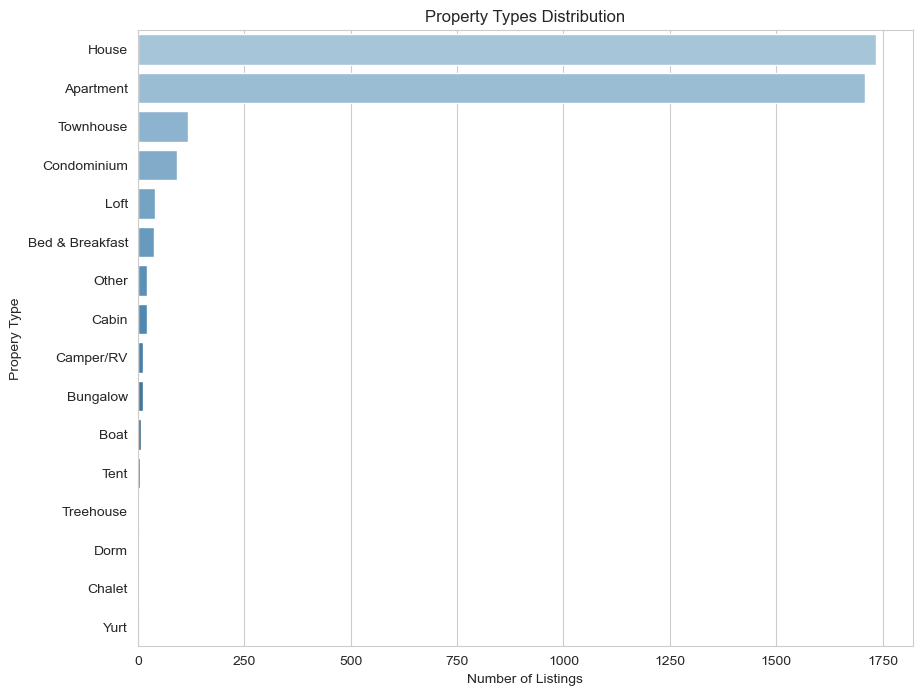

In [94]:
# Property Types Distribution
sns.set_style("whitegrid")  # aesthetic style of the plots

# Distribution of the property types
property_type_counts = airbnb_listings['property_type'].value_counts()

# Bar chart for the distribution of propery types
plt.figure(figsize=(10, 8))
sns.barplot(x=property_type_counts.values, y=property_type_counts.index, palette="Blues_d")
plt.title("Property Types Distribution")
plt.xlabel("Number of Listings")
plt.ylabel("Propery Type")
plt.savefig('plot1.png')
plt.show()

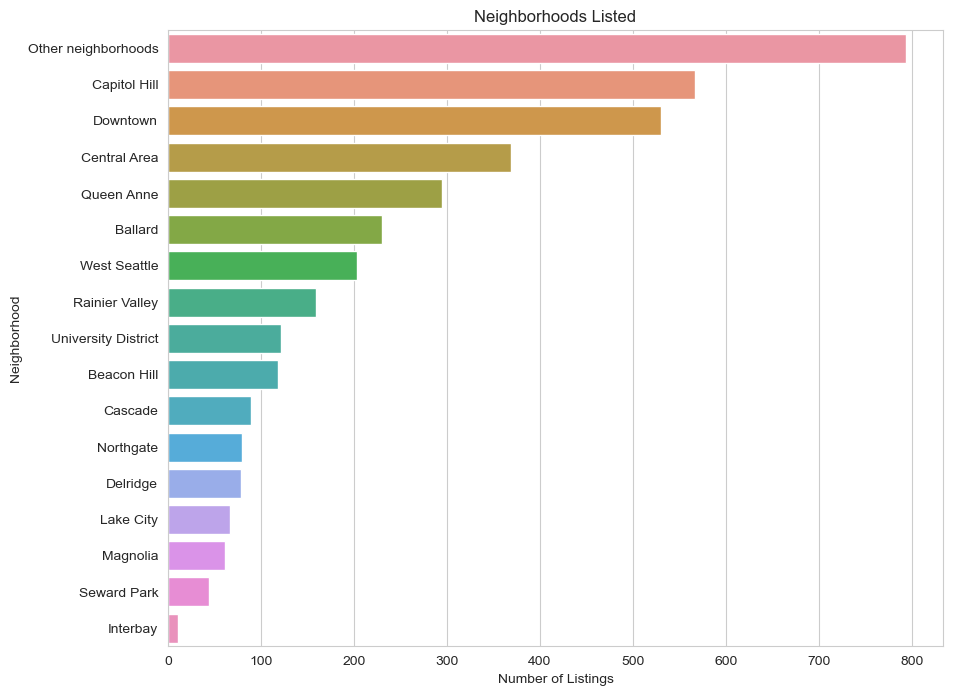

In [95]:
# Listings by Neighborhood
plt.figure(figsize=(10, 8))
sns.countplot(data=airbnb_listings, y='neighbourhood_group_cleansed', order=airbnb_listings['neighbourhood_group_cleansed'].value_counts().index)
plt.title('Neighborhoods Listed')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.savefig('plot2.png')
plt.show()

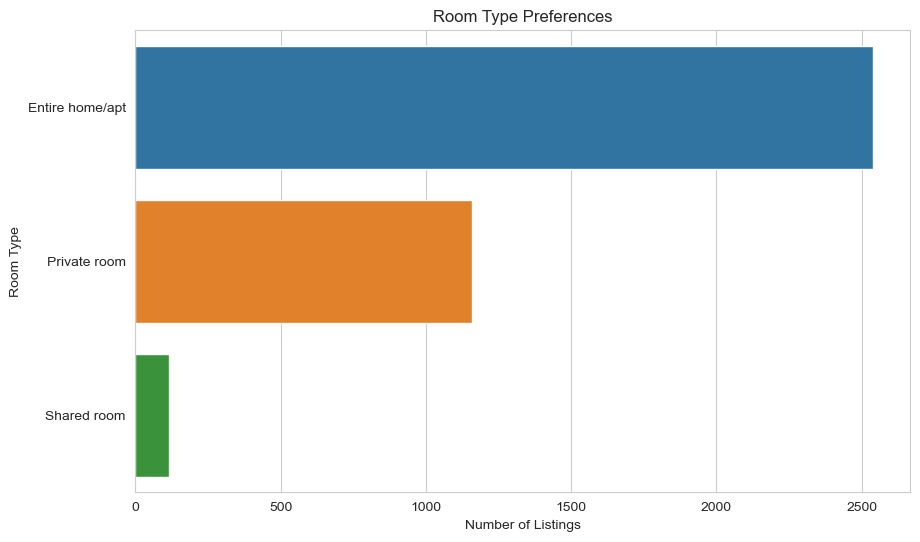

In [96]:
# Type of Room Prefered
plt.figure(figsize=(10, 6))
sns.countplot(data=airbnb_listings, y='room_type', order=airbnb_listings['room_type'].value_counts().index)
plt.title('Room Type Preferences')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.savefig('plot3.png')
plt.show()

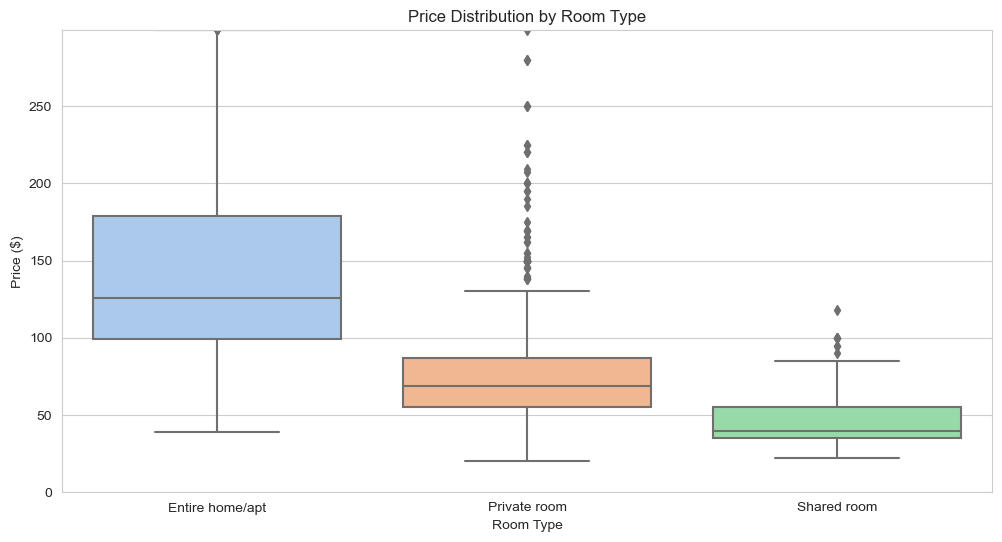

In [97]:
# Price By Room Type
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=airbnb_listings, palette='pastel')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, airbnb_listings['price'].quantile(0.95))  
plt.savefig('plot4.png')
plt.show()

In [88]:
#Merging the listings and reviews datasets to check some of the comments for the listings
listings_reviews = pd.merge(airbnb_listings, airbnb_reviews, on='id')

In [89]:
#Print first 5 rows
listings_reviews.head()

,id,name,description,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,date,reviewer_id,reviewer_name,comments
0,6575407,Room with Downtown Seattle Views!,One bedroom available in a 2 bedroom condo in ...,"8th Avenue Northeast, Seattle, WA 98105, Unite...",University District,University District,University District,Seattle,WA,98105,...,flexible,f,f,1,0.29,1060467,2013-08-17,318952,Edwin,Super clean and comfortable apartment. Hande w...
1,7550234,Blue Nautical Room w/Breakfast,"This room is spacious, clean, peaceful and com...","11th Avenue Northeast, Seattle, WA 98105, Unit...",University District,University District,University District,Seattle,WA,98105,...,strict,f,f,21,4.45,619366,2013-09-24,4523817,Sascha,I stayed about a dozen times with AirBnB and W...
2,3959442,"Modern Studio, Lovely Neighborhood","Just outside the bustle of Capitol Hill, our h...","15th Avenue, Seattle, WA 98122, United States",Capitol Hill,Minor,Central Area,Seattle,WA,98122,...,moderate,f,f,1,4.27,365550,2013-03-31,4881286,Ivy,Dirk&Jaq responded to all our inquiries and co...
3,4565370,The Reading Room at The Farmhouse,A cozy room with a full size bed and vintage f...,"East Fir Street, Seattle, WA 98122, United States",Minor,Minor,Central Area,Seattle,WA,98122,...,flexible,f,f,2,2.47,208670,2013-05-13,4199518,Gillian,We enjoyed our stay at David's place. It's sit...
4,607788,"condo Seattle, Wa.",studio (2 ppl) through 2 bedroom units (6 ppl)...,"9th Ave, Seattle, WA 98101, United States",Central Business District,Central Business District,Downtown,Seattle,WA,98101,...,strict,f,f,2,0.05,5682,2011-10-08,759299,Cathy,Hostess with the most-est! The room was exactl...


In [90]:
#check merged dataset summary
listings_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                9 non-null      object 
 1   name                              9 non-null      object 
 2   description                       9 non-null      object 
 3   street                            9 non-null      object 
 4   neighbourhood                     9 non-null      object 
 5   neighbourhood_cleansed            9 non-null      object 
 6   neighbourhood_group_cleansed      9 non-null      object 
 7   city                              9 non-null      object 
 8   state                             9 non-null      object 
 9   zipcode                           9 non-null      object 
 10  smart_location                    9 non-null      object 
 11  latitude                          9 non-null      object 
 12  longitude   

In [93]:
#print a few selected columns
selected_columns = listings_reviews[['price', 'comments','id','room_type']]
print(selected_columns)

   price                                           comments       id  \
0  120.0  Super clean and comfortable apartment. Hande w...  6575407   
1   40.0  I stayed about a dozen times with AirBnB and W...  7550234   
2   95.0  Dirk&Jaq responded to all our inquiries and co...  3959442   
3   70.0  We enjoyed our stay at David's place. It's sit...  4565370   
4  250.0  Hostess with the most-est! The room was exactl...   607788   
5  120.0  I had the most wonderful 2-night stay at Tayya...  9908825   
6   75.0  Just needed to stay near Ballard as we were he...   392140   
7   80.0  Marilyn and Cynthia were very warm and welcomi...  1589681   
8   95.0  Hard to describe my stay at Michael's place in...  7527242   

         room_type  
0     Private room  
1     Private room  
2  Entire home/apt  
3     Private room  
4     Private room  
5  Entire home/apt  
6     Private room  
7  Entire home/apt  
8  Entire home/apt  


# Evaluation / Conclusion

The 4 business questions were answered as follows;

1. What are the room type preferences in the Seattle Airbnb market? - Entire homes are most preferred, followed by Private rooms
   then lastly shared rooms.

2. What are the property types hosts have offered for the Seattle Airbnb market? - The top 5 preferred properties are Houses, 
   Apartments, Townhouses, Condominiums and Lofts in that order.

3. What are the price distributions for the different room types offered for the Seattle Airbnb market? - Entire homes cost
   roughly between $100 and $175 per night, private rooms cost roughly between $60 and $80 per night and private rooms cost        roughly between $40 and $60 per night.
   
4. Which neighborhoods in the Seattle area have the most property listed? - Capitol Hill, Downtown, Central Area, Queen Anne and    Ballard have the most property listed in that order.